# H SAF H31 (MSG/SEVIRI) Snow Extent

### Niilo Siljamo (FMI)

***

In this session, the basic properties and use of the H SAF H31 (MSG/SEVIRI Snow Extent) product will be presented.


## Geostationary vs polar orbit

<img src="img/sats.png" width="900">

## H31 properties and development principles
***
The H31 snow extent product is
1. daily (since 2008)
2. full disk (since 2015, earlier it was produced in 4 regions (Euro, NAfr, SAfr, SAme)
3. MSG/SEVIRI
4. binary snow extent (snow/no snow) product
5. based on optical remote sensing data (visible light, IR)

The product is developed using so called empirical approach, which means that the rules used in the classification algorithm are based on large number (over 0.5 million) hand classified pixels which cover different land cover types, different snow cover situations and different light conditions. This important because snow cover is highly variable.

Both H31 and H32 snow extent products are developed based on these principles:
1. Accuracy over coverage (do not force classification, avoid misclassifications)
2. Single-source data (satellite data only, do not use auxiliary snow data such as weather station observations)
3. Directness: avoid redundant steps (such as cloud masking)

### Snow cover examples: Basics
***
Ideal snow cover for satellite detection would be something like this:
<img src="img/p1020668.jpg" width="700">

But snow cover is rarely ideal. We may have new patchy snow:
<img src="img/2005-12-11++12-34-23.jpg" width="700">

or patchy melting snow:
<img src="img/natalie1241507401.jpg" width="500">
<img src="img/p1030096.jpg" width="700">


### Snow cover examples: Forests
***

Vegetation has also huge impact on surface properties. Long grass and shrubs can hinder snow detection, but in satellite snow detection the most relevant vegetation type are different forests. Things to consider are:
1. Tree species (evergreen vs deciduous)
2. Forest density
3. Viewing angles (nadir vs edge of detection disk)
4. Snow on trees
5. Shadows

#### Forests
Evergreen trees can prevent surface detection partly or completely
<img src="img/p1030061.jpg" width="700">

Deciduous trees are partly transparent from satellites. You can see the surface, but dark tree trunks may change the view
<img src="img/IMG_20191107_084547_01.jpg" width="700">

unless they are snow covered
<img src="img/IMG_20190206_102833.jpg" width="700">

Sometimes trees can be completely snow covered
<img src="img/2005-11-27++10-45-37-rot.jpg" width="400">

Forests density varies quite a lot even in one satellite pixel
<img src="img/natalie1268909356.jpg" width="700">

#### Viewing angles
Trees are not the same in all viewing angles. In nadir, you can see the canopy from top, but not the surface under the tree. Near the edge you see the canopy from the side, but also the area under the tree. The canopy blocks the view further away from the tree.
<img src="img/natalie1236940373.jpg" width="500">

#### Shadows
Of course, you must not forget the shadows. Optical remote sensing of the surface needs cloud free daylight conditions and that means there will be shadows. Those parts of the surface which are in the shadow look different that those parts which are in direct sunlight.
<img src="img/natalie1237365379.jpg" width="600">


### Chaos
***
Quite often chaos is the best word when you want to describe what you see from space

<img src="img/2006-03-07++15-46-28.jpg" width="700">



## H31 algorithm
***
Optical snow detection is based on the varying reflective properties of different surface types (including clouds in this case). These differences can be utilized in the snow detection algorithm.

<img src="img/oton_spektri_crop.png" width="700">



## So, what next
***
Now, we know that different surfaces and clouds have different reflective properties. How can we use that idea to develop something practical? 

<img src="img/england.png" width="900">

We can use data from different channels to create RGB images where snow, clouds, snow free surface and seas and lakes are easy to recognize, at least by humans. The challenge is how to tell that to computers. How to tell that slightly different yellow or red shades mean different things, such as ice clouds and snow?

<img src="img/hills.png" width="900">

The old way (used during the development of the H31 algorithm) is to collect lots of example cases of different surface types and then try to find classification rules which produce correct results. More modern way is still to collect that example data set and use it as training data and develop an AI based algorithm.


## Two-phase H31 algorithm

The H31 algorithm uses radiances and brightness temperatures in 6 SEVIRI channels. The algorithm aims to detect snow covered and snow free surfaces without any preliminary steps such as cloud masking. Each pixels is either snow covered, snow free, partially snow covered (not used much), water, unclassified or unprocessed (space outside the SEVIRI detection disk). The algorithm consists of about 20 thresholding rules, which aim to detect whether the land pixels are snow covered or snow free. If this can not be decided, the pixels will be unclassified by default. These unclassified pixels include cloydy and night pixels and also those pixels which are too difficult to classify reliably.


The H31 algorithm consists of two phases. First phase produces single image snow cover products (SC1) every 15 minutes. Then, the phase 2 merges all these single image snow products and produces the daily (SC2) H31 product.
<img src="img/SnowFlow.png" width="500">

## Product validation
***
All satellite products should be validated before use. The best way is to compare satellite products and observations. In this case, SYNOP observations of snow depth and the state of the ground were used. More about validation e.g. in the paper mentioned above or in my thesis:

Siljamo, N 2020, 'Empirical Approach to Satellite Snow Detection', Helsingin yliopisto, Helsinki. <http://hdl.handle.net/10138/317970>

## How to get the data?
-----------------
The H31 product can be retrieved in NRT or from web archives.

Near real time data is available via:
- EUMETCast
- Automatic FTP Dissemination (LSA SAF by request)

Archived older product files are available either from H SAF website (https://hsaf.meteoam.it/) or from the LSA SAF website (https://landsaf.ipma.pt/). Data download requires registration in both systems.

You can get the data from H SAF website:
<img src="img/hsaf1.png" width="800">
<img src="img/hsaf2.png" width="800">
<img src="img/hsaf3.png" width="800">

or from LSA SAF website:
<img src="img/landsaf1.png" width="800">
<img src="img/landsaf2.png" width="800">
<img src="img/landsaf3.png" width="800">

The file format used is HDF5 and the contents of the files are described in the product documentation (also available from both web sites. In each file, daily snow extent product is presented for full MSG/SEVIRI disk.

For this demo, one example product file (HDF5_LSASAF_MSG_SC2_MSG-Disk_202002080000) has been retrieved. 

## Python: Loading and plotting the data
-----------------

There are many ways to read the files and use the data. For example, we can use h5py package.

First, import necessary libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


Then, we can read the data. For snow extent, you do not need scale and offset values, but other attributes can be read in the same way. The attributes are described in the product documentation.

In [2]:
snow_fn = 'data/HDF5_LSASAF_MSG_SC2_MSG-Disk_202002080000'
with h5py.File(snow_fn, 'r') as fid:
        dataset = fid['SC']
        sc_data = np.array(dataset)
        #scale = dataset.attrs['SCALING_FACTOR']
        #offset = dataset.attrs['OFFSET']
        

Let's see that the snow extent data has been read into the variable sc_data

In [3]:
sc_data[2380:2390, 1200:1210]


array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]], dtype=uint8)

The array contains integers as expected.

Every pixel in the product describes the snow extent using the classifications:<br>
0 Pixel is not processed<br>
1 Full snow cover<br>
2 Partial snow cover<br>
3 No snow<br>
4 Pixel could not be classified (night, clouds, classification uncertain<br>
5 Water

Now the data can then be used in applications. 

Next step can be e.g. plotting the data to see what kind of data we have. First, we create a figure and define a colormap, which helps to understand the image. Then we plot the image. We must define the minimum and maximum values in the array for that to work. 

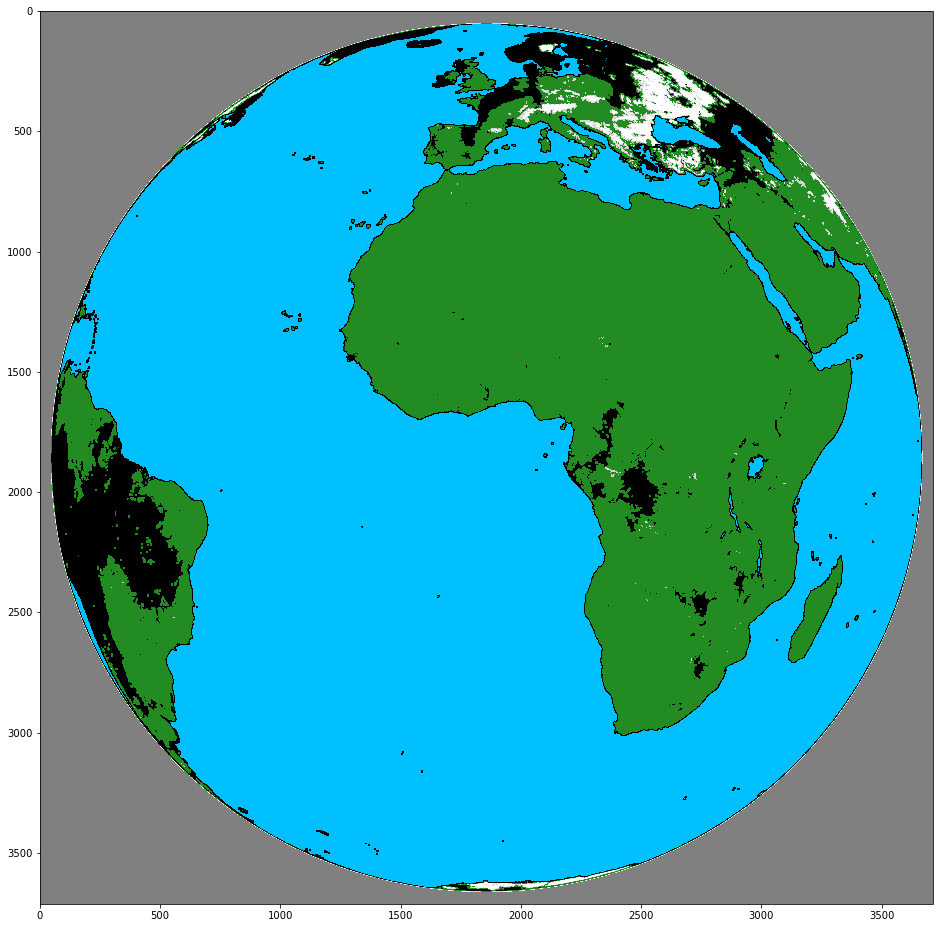

In [4]:
plt.figure(1,figsize=(16,20))
sc_colormap = colors.ListedColormap(['gray','white','lightgrey',
                                  'forestgreen','black','deepskyblue'])
plt.imshow(sc_data, vmin=0, vmax=6, cmap=sc_colormap)
plt.show()

## Python: Reprojecting 
-----------------


### Pytroll reprojection and plotting example
-----------------



Pytroll can be used to analyse and process the data. We have used NASA Worldview and retrieved a snapshot image (MODIS and/or VIIRS) in geoTIFF format (saved as Europe_5km.tiff). We can then use Pytroll functions to reproject H31 Snow Extent to the same projection used in the geotiff.

First we must import more packages


In [5]:
import numpy as np
from satpy import Scene
from pyresample import kd_tree, geometry
import h5py
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from pyproj import CRS
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='pyproj')


Then we need to define some functions. The reprojected_to_tiff reads the geotiff and reprojects the snow extent to the same projection and cuts the same area from the data. We must also read the pixel coordinates of the H31 product from coordinate files. See the pytroll documentation for details.

In [6]:
def reprojected_to_tiff(ref_fname, snow_fname, resolution=0.10, src='H31'):
    """
    Reproject snow product to geotiff area
    """

    # Reference image filename
    # ref_fname = sys.argv[0]

    # Input data filename
    # snow_fname = sys.argv[1]

    # Fixed LAT and LON files
    lat_fn = 'data/HDF5_LSASAF_MSG_LAT_MSG-Disk_201807110815'
    lon_fn = 'data/HDF5_LSASAF_MSG_LON_MSG-Disk_201807110815'

    # Read area of the reference image
    scn = Scene(reader='generic_image', filenames=[ref_fname])
    scn.load(['image'])
    target_area = scn['image'].area

    # Read data and coordinates
    # Read snow data and coordinates
    if src == 'H31':
        with h5py.File(snow_fname, 'r') as fid:
            data = fid['SC'][()]
        with h5py.File(lat_fn, 'r') as fid:
            lats = fid['LAT'][()]/100
        with h5py.File(lon_fn, 'r') as fid:
            lons = fid['LON'][()]/100

    # Create swath definition for the input data
    swath_def = geometry.SwathDefinition(lons=lons, lats=lats)

    # Resample using nearest-neighbour interpolation
    result = kd_tree.resample_nearest(swath_def, data, target_area,
                                      radius_of_influence=100000)

    return scn['image'], result


Then we define plot_2, which contains the actual code for drawing the MODIS/VIIRS image and reprojected snow product. The code <br>
1. creates a colormap<br>
2. transposes and scales the tiff image<br>
3. plots the MODIS/VIIRS image<br>
4. plots the snow map with legend

If you want to save the image you can use one of the commented (marked by #) plt.savefig lines at the end. If this code is used in python shell or in a package, the line plt.ion() turns on the interactive mode.


In [7]:
def plot_2(tiff_image, snow1, title0='', title1='', figname='tmp', single='no'):
    """
    Plot NASA Worldview vs H31/H32.
    """
    sc_colormap = colors.ListedColormap(['gray','white','lightgrey',
                                  'forestgreen','black','deepskyblue'])
    # Transpose and scale tiff
    modis = np.zeros((snow1.shape[0], snow1.shape[1], 3), dtype=float)
    modis[:,:,0] = tiff_image[0]/255
    modis[:,:,1] = tiff_image[1]/255
    modis[:,:,2] = tiff_image[2]/255

    plt.figure(1,figsize=(8,10))
    plt.clf()
    #plt.ion()

    plt.subplot(211)
    plt.title(title0)
    plt.axis('off')
    plt.imshow(modis)#

    plt.subplot(212)
    plt.title(title1)
    plt.axis('off')
    plt.imshow(snow1, vmin=0, vmax=6, cmap=sc_colormap)
    plt.legend([mpatches.Patch(facecolor='white',edgecolor='black'), 
                mpatches.Patch(facecolor='lightgrey',edgecolor='black'), 
                mpatches.Patch(facecolor='forestgreen',edgecolor='black'), 
                mpatches.Patch(facecolor='deepskyblue',edgecolor='black'), 
                mpatches.Patch(facecolor='black',edgecolor='black')], 
               ['snow', 'partial', 'no snow', 'water','not classified'], loc=3)#

    plt.tight_layout()
    plt.show()
    #plt.savefig(figname+".pdf", papertype = 'a4', orientation = 'portrait', format = 'pdf')
    #plt.savefig(figname+".png", papertype = 'a4', orientation = 'portrait', format = 'png')


All this is used in plot_areaH31 which calls reprojected_to_tiff with suitable parameters and then the plotting function with the data returned from the reprojection.

In [8]:
def plot_areaH31(tiff_name='data/Europe_5km.tiff', snow_name='data/HDF5_LSASAF_MSG_SC2_MSG-Disk_202002080000', day='20200208', figname='', single='no'):
    """
    Plot the area in the geotiff, 1x2 (MODIS/VIIRS, H31).
    """
    tkuva, snow1 = reprojected_to_tiff(
        tiff_name, snow_name, resolution=0.01, src='H31')
    plot_2(tkuva, snow1,
           title0='MODIS '+day,
           title1='H31 '+day,
           figname=figname+'H31',
           single=single)


Finally, we can run the code which needs a little bit of time to draw the image you can use to compare MODIS/VIIRS RGB image and H31 Snow Extent product.


cannot convert float NaN to integer


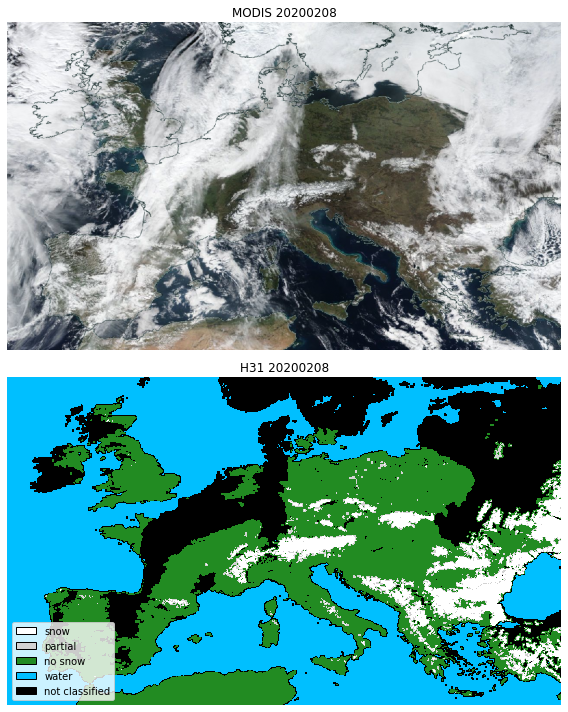

In [9]:
plot_areaH31(tiff_name='data/Europe_5km.tiff', snow_name='data/HDF5_LSASAF_MSG_SC2_MSG-Disk_202002080000',
             day='20200208', figname='')


## How to use satellite snow product in NWP data assimilation 
***

Snow extent products can be used in weather model data assimilation. It will not be the only or even primary data source for snow cover, but satellite snow extent product can improve snow analysis especially in areas where weather stations do not measure snow cover.

The picture below presents one way to use satellite snow extent data in weather model data assimilation in three step. In step 1, high resolution satellite data is converted to suitable resolution for the weather model. In step 2 these observations are converted to pseudo-observations which can be assimilated in the normal data assimilation process in step 3.

<img src="img/NWP_example.png" >

### Current users

At the moment, the H31 snow extent product is used in the Met Office local area model.
